In [7]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

sns.set()

df1 = pd.read_csv("export.csv", header=0)

# drop duplicates where titles are the same
df2 = df1.copy()
df2 = df2.drop_duplicates(subset = 'title')

# check lengths to make sure duplicate titles are dropped
print(len(df2))
print(len(df1))

df2.head(0)

1335
1823


,score_unvoted_numbers,author,number_of_comments,score_likes_numbers,time_submitted_ago,score_dislikes_numbers,title


In [8]:
# remove 'comments' from number_of_comments
df2['number_of_comments'] = df2.number_of_comments.str.rstrip('comments')


    

In [9]:
# convert strings to floats
list_to_change = ['number_of_comments'
,'score_dislikes_numbers'
,'score_likes_numbers'
,'score_unvoted_numbers']

for col in list_to_change:  
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    # confirm type is converted
    print(type(df2[col][0]))

# df2['number_of_comments'] = pd.to_numeric(df2['number_of_comments'], errors='coerce')
# df2['score_dislikes_numbers'] = pd.to_numeric(df2['score_dislikes_numbers'], errors='coerce')
# df2['score_likes_numbers'] = pd.to_numeric(df2['score_likes_numbers'], errors='coerce')
# df2['score_unvoted_numbers'] = pd.to_numeric(df2['score_unvoted_numbers'], errors='coerce')

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [12]:
import re
import nltk
from nltk.corpus import stopwords



def to_words(content):
    letters_only = re.sub("[^a-zA-Z]", " ", content) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [13]:
# Figure out nltk.corpus
clean_title=[]
for title in df2['title']:
    clean_title.append(to_words(title))

LookupError: 
**********************************************************************
  Resource 'corpora/stopwords' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - '/Users/Bing/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

In [3]:
'''Testing...'''

# print(df.number_of_comments.head(20))
# print(type(df.number_of_comments[13]))
# print(df.number_of_comments[13])

'''# convert numbers into integers
# adding both export file comments to one list'''
number_of_comments_int = []


for number in df.number_of_comments:  
    if number == '':
        number_of_comments_int.append(0)   
    else:
        number_of_comments_int.append(int(number))

        

'''Tests'''
# print(df.number_of_comments)
print(number_of_comments_int)
# print(type(df.number_of_comments[0]))



[57, 13, 10, 245, 36, 37, 88, 7, 7, 2, 107, 99, 0, 0, 9, 82, 2, 11, 161, 3, 36, 69, 49, 3, 2, 4, 256, 0, 2, 37, 75, 17, 29, 23, 23, 6, 0, 453, 0, 2, 21, 88, 222, 6, 59, 2, 19, 95, 5, 10, 96, 2, 187, 32, 13, 132, 23, 3, 1375, 50, 57, 53, 0, 2, 3, 1, 2, 22, 67, 0, 37, 24, 152, 30, 18, 1, 18, 23, 24, 38, 67, 57, 73, 32, 42, 125, 43, 5, 36, 3, 42, 21, 42, 32, 1, 223, 44, 55, 2, 15, 13, 9, 353, 6, 12, 11, 39, 12, 81, 283, 11, 166, 24, 101, 3, 18, 31, 25, 150, 28, 5, 0, 178, 34, 47, 62, 113, 13, 23, 111, 11, 148, 11, 31, 31, 79, 139, 14, 55, 39, 44, 1, 9, 5, 18, 132, 21, 101, 143, 6, 11, 169, 4, 64, 65, 8, 1, 25, 0, 393, 161, 52, 489, 7, 22, 80, 46, 5, 13, 14, 436, 34, 198, 11, 43, 7, 59, 12, 17, 96, 1, 15, 120, 40, 3, 92, 108, 0, 27, 23, 5, 32, 55, 6, 41, 13, 4, 46, 61, 137, 11, 6, 13, 20, 15, 16, 9, 36, 249, 4, 4, 46, 69, 90, 278, 113, 28, 1, 57, 106, 13, 5, 285, 2, 78, 15, 50, 85, 14, 4, 122, 48, 42, 13, 3, 65, 106, 17, 13, 5, 1, 85, 360, 24, 0, 210, 55, 44, 18, 622, 57, 87, 22, 49, 116, 

In [4]:
# adding number_of_comments_int to dataframe
df['number_of_comments_int'] = number_of_comments_int

# # df = df.append(number_of_comments_int, ignore_index=True)
# # print(number_of_comments_int)
# # df.number_of_comments_int.mean()
df.head()

,score_unvoted_numbers,author,number_of_comments,score_likes_numbers,time_submitted_ago,score_dislikes_numbers,title,number_of_comments_int
0,33,nymusix,57,34,7 hours ago,32,[The Comeback] The NBA and its fans are now th...,57
1,22,WizOfAwesSite,13,23,5 hours ago,21,"Josh Howard Calls It A Career, Moves To Coachi...",13
2,27,GettingLostInDaSauce,10,28,6 hours ago,26,James Harden Full Highlights 2015.03.19 vs Nug...,10
3,3589,Athletics115,245,3590,1 day ago,3588,Report: Rockets To Retire Yao Ming’s Jersey,245
4,67,Dindinpark,36,68,12 hours ago,66,Curry on Golfing with POTUS,36


In [5]:
# print(type(df['number_of_comments_int'][2]))
# df.describe()

/Users/Bing/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


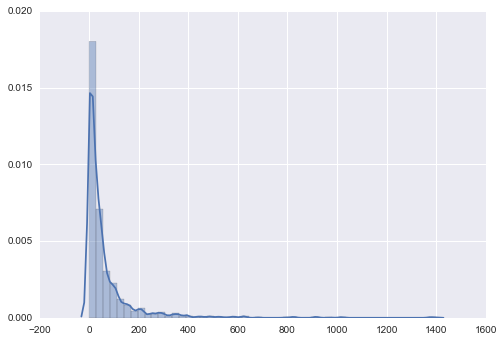

In [6]:
sns.distplot([number_of_comments_int])


In [7]:
# find index of the rows for which column: number of comments is > 200 and put them in a new list
index_of_number_of_comments_greater_than_200 = df[df['number_of_comments_int']>200].index.tolist()
# finds the rows in df and displays them 
rows_greater_than_200comments = df.loc[index_of_number_of_comments_greater_than_200]

138


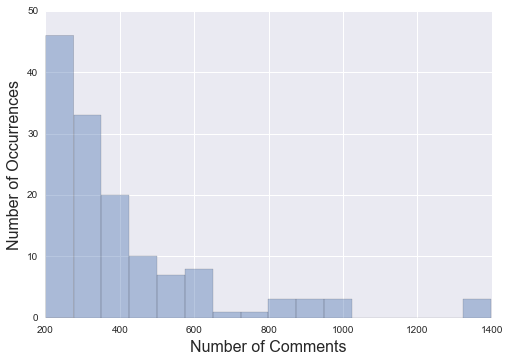

In [8]:
number_of_comments_more_than_200 = []
for number in df['number_of_comments_int']:
    if number >200:
        number_of_comments_more_than_200.append(number)
        
print(len(number_of_comments_more_than_200))
sns.distplot(number_of_comments_more_than_200, kde=False)
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel("Number of Comments", fontsize=16)




/Users/Bing/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


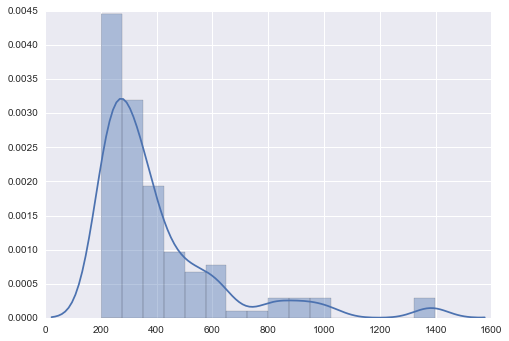

In [9]:
sns.distplot(number_of_comments_more_than_200)

In [10]:
from IPython.display import Image

# histogram from first export file:
# PATH = "/home/bodowd2/Documents/Code_Projects/Reddit-r-nba-scrapy/Reddit_r_nba/histogram of >200 comments from first export.png"
Image("/home/bodowd2/Documents/Code_Projects/Reddit-r-nba-scrapy/Reddit_r_nba/histogram of >200 comments from first export.png" , width=800, height=800)

In [11]:
type(rows_greater_than_200comments.values)
# rows_greater_than_200comments.score_unvoted_numbers.head()

numpy.ndarray

In [12]:
# subset of data with just numbers to make pair plot
import matplotlib.pyplot as plt
subset_data = [rows_greater_than_200comments.score_unvoted_numbers.values,
               rows_greater_than_200comments.number_of_comments_int.values,
               rows_greater_than_200comments.score_likes_numbers.values,
               rows_greater_than_200comments.score_dislikes_numbers.values]

# g = sns.PairGrid(subset_data)
# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter)
# g.add_legend()






In [13]:
rows_greater_than_200comments.groupby('author').count()

,score_unvoted_numbers,number_of_comments,score_likes_numbers,time_submitted_ago,score_dislikes_numbers,title,number_of_comments_int
author,,,,,,,
4for5,2,2,2,2,2,2,2
ABlackcapsFan,1,1,1,1,1,1,1
AfflaloCreed,1,1,1,1,1,1,1
Athletics115,2,2,2,2,2,2,2
BearsNecessity,1,1,1,1,1,1,1
BismackMyBiyombo,2,2,2,2,2,2,2
CaucasianCactus,2,2,2,2,2,2,2
Chidori611,1,1,1,1,1,1,1
Chuggawumba123,1,1,1,1,1,1,1


In [14]:
# def splot_data(col1, col2, data, hue_col, label1, label2, xls, yls, sz=8):
    
#     # Make the  scatter plot on the DataFrame
#     jp = sns.lmplot(col1, col2, data,
#                     fit_reg=False, hue=hue_col, size=sz, scatter_kws ={'s': 60})
    
#     # Decorate the plot and set limits
#     jp.set_axis_labels(label1, label2)

#     jp.axes[0,0].set_xlim(xls)
#     jp.axes[0,0].set_ylim(yls)

#     sns.despine(offset=0, trim=True)
#     sns.set(style="ticks", font_scale=2.0)

In [15]:
# splot_data(rows_greater_than_200comments['score_likes_numbers'], 'number_of_comments_int', 'author', rows_greater_than_200comments, 'Likes', '# of comments', (-1,1), (-1,1) )

In [16]:
rows_greater_than_200comments['author'].unique()

array(['Athletics115', 'Toront06', 'SharksFanAbroad', 'Edgar_Allan_Poo',
       'SoupyWolfy', 'FayazsF', 'artdilly', 'CreativityLacking',
       'ManuGinosebleed', 'CaucasianCactus', 'The71stSean', 'ClarkeM21',
       'urfaselol', 'inputfail', 'Dorokin240', '4for5', 'm3s1',
       'PingedSpinxz', 'tmstamp215', 'teriyakisushi', 'monetclaude',
       'ThatGuyFromCanadia', 'IRunLikeADuck', 'DrTom', 'andris_biedrins',
       'Melanismdotcom', 'boltonstreetbeat', 'FreshPrinceOfMD',
       'Good_NewsEveryone', 'Egoslapper', 'TwinkiesForAmerica', 'wjbc',
       'BearsNecessity', 'Chuggawumba123', 'rambos_left_bicep',
       'PrinceLifer', 'DishingLikeClyde', 'blessedmitch', 'deezlobs',
       'tpcourier', 'ImGonnaObamaYou', 'AfflaloCreed', 'cannonflake',
       'Steezus_H_Christ', 'GurleyThings', 'goko305', 'Dimaaaa,youtube',
       'SportsMasochist,self.nba', 'Hi_My_Name_Is_Dave', 'RaoulDuke504',
       'GroundhogNight', 'GayForLebron', 'iFlewStew', 'jimmcdermont',
       'kubidehsammich', '

In [17]:
df[df.number_of_comments_int > 200]

,score_unvoted_numbers,author,number_of_comments,score_likes_numbers,time_submitted_ago,score_dislikes_numbers,title,number_of_comments_int
3,3589,Athletics115,245,3590,1 day ago,3588,Report: Rockets To Retire Yao Ming’s Jersey,245
26,16,Toront06,256,17,"11 hours ago,*",15,Why do people think Derrick Rose didn't deserv...,256
37,2354,SharksFanAbroad,453,2355,1 day ago,2353,"Allen Iverson is the only 6'0"" or shorter HoFe...",453
42,180,Edgar_Allan_Poo,222,181,1 day ago,179,I'm on a huge Larry Bird binge. I thought LeBr...,222
58,359,SoupyWolfy,1375,360,1 day ago,358,Who in the NBA makes your blood boil?,1375
95,120,FayazsF,223,121,1 day ago,119,"Who do you guys think is going to have their ""...",223
102,192,artdilly,353,193,1 day ago,191,[Sports Illustrated] Top 100 Players of 2017,353
109,645,CreativityLacking,283,646,1 day ago,644,Hawks center Dwight Howard hospitalized after ...,283
159,1121,ManuGinosebleed,393,1122,2 days ago,1120,Clutch Shooting Last 3 Seasons (forgive the cr...,393
162,369,CaucasianCactus,489,370,2 days ago,368,Which Draft Picks are so Bad People Completely...,489


In [18]:
df.score_dislikes_numbers = df.score_dislikes_numbers.str.replace('•', '') 
df.score_likes_numbers = df.score_likes_numbers.str.replace('•', '') 
dislikes_int = []
for score in df.score_dislikes_numbers:  
    if score == '':
        dislikes_int.append(0)   
    else:
        dislikes_int.append(int(score))

likes_int = []
for score in df.score_likes_numbers:  
    if score == '':
        likes_int.append(0)   
    else:
        likes_int.append(int(score))        
# adding number_of_comments_int to dataframe
df['dislikes_int'] = dislikes_int
df['likes_int'] = likes_int


In [19]:
df.dislikes_int.describe()
df[df.number_of_comments_int > 200].describe()
df.likes_int.describe()

# df.dislikes_int[df.number_of_comments_int > 200].isnull()
# df[df.number_of_comments_int > 200].isnull()

count    1823.000000
mean      170.343390
std       508.198623
min         0.000000
25%         9.000000
50%        25.000000
75%       118.000000
max      5735.000000
Name: likes_int, dtype: float64

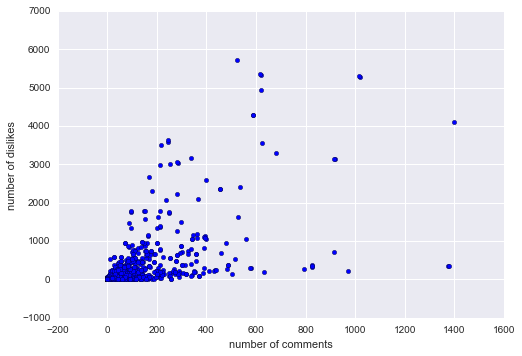

In [20]:
#Generate figure and axes objects
fig, ax = plt.subplots()

# data
x = df.number_of_comments_int 
y = df.dislikes_int

# plot
ax.scatter(x,y)

# set axes
ax.set_xlabel('number of comments')
ax.set_ylabel('number of dislikes')


plt.show()

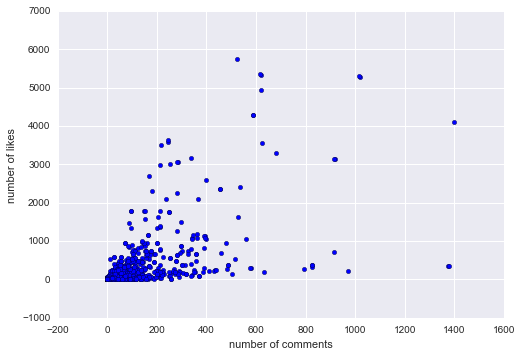

In [21]:
#Generate figure and axes objects
fig, ax = plt.subplots()

# data
x = df.number_of_comments_int
y = df.likes_int

# plot
ax.scatter(x,y)

# set axes
ax.set_xlabel('number of comments')
ax.set_ylabel('number of likes')


plt.show()

In [25]:
df['title'].str.split(expand = True)
# df['title'].str.split()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,[The,Comeback],The,NBA,and,its,fans,are,now,the,...,None,None,None,None,None,None,None,None,None,None
1,Josh,Howard,Calls,It,A,"Career,",Moves,To,Coaching,A,...,None,None,None,None,None,None,None,None,None,None
2,James,Harden,Full,Highlights,2015.03.19,vs,Nuggets,-,50,Pts,...,None,None,None,None,None,None,None,None,None,None
3,Report:,Rockets,To,Retire,Yao,Ming’s,Jersey,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Curry,on,Golfing,with,POTUS,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,Will,Joe,Johnson,be,in,the,Hall,of,Fame?,None,...,None,None,None,None,None,None,None,None,None,None
6,Scottie,Pippen:,Ultimate,Defender,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,Shaq,vs,Chuck,MMA,compilation,-,[3:24],None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,Paul,Pierce,passes,Larry,Bird,on,the,all-time,Celtics,scoring,...,None,None,None,None,None,None,None,None,None,None
9,Brian,Scalabrine,showing,off,the,modesty.,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
